# House Price Prediction in Bangalore, India

In [22]:
import pandas as pd
import numpy as np

from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

!pip install geocoder
import geocoder

import requests

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h516909a_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.8           |   py36h45558ae_2         628 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    jinja2-2.11.2              |     pyh9f0ad1d_0          93 KB  conda-forge
    pandas-1.0.3               |   py36h830a2c2_1        11.1 MB  conda-

In [85]:
#  Foursquare Credentials 
client_id = '0GE21IKRH3FZODF1RNWDMLN1LUFENFD0EAYCZ3VXT4V4OMAE'
client_secret = '0EO1LG0JP10J3CN5HYFDCCZM3ACMDXPZWPBY1WXQBIQZHXAI'
version = '20201604'
limit = 100

In [117]:
# Get Banglore coordinates
address = "Banglore, India"

geolocator = Nominatim(user_agent="e_tgg")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print(address, "coordinates:", latitude, ",", longitude)

Banglore, India coordinates: 18.0056901 , 79.5715088


In [118]:
# Mts
radius = 500

In [119]:
# Define URL
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    client_id, 
    client_secret, 
    latitude, 
    longitude, 
    version, 
    radius, 
    limit)
url

'https://api.foursquare.com/v2/venues/explore?client_id=0GE21IKRH3FZODF1RNWDMLN1LUFENFD0EAYCZ3VXT4V4OMAE&client_secret=0EO1LG0JP10J3CN5HYFDCCZM3ACMDXPZWPBY1WXQBIQZHXAI&ll=18.0056901,79.5715088&v=20201604&radius=500&limit=100'

In [120]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9927c395feaf001bad9535'},
 'response': {'headerLocation': 'Warangal',
  'headerFullLocation': 'Warangal',
  'headerLocationGranularity': 'city',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 18.010190104500005,
    'lng': 79.57623170275289},
   'sw': {'lat': 18.001190095499993, 'lng': 79.56678589724712}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ea279897ee52a35dce92bf9',
       'name': 'Thousand Pillar Temple',
       'location': {'lat': 18.00426345496528,
        'lng': 79.57485226131779,
        'labeledLatLngs': [{'label': 'display',
          'lat': 18.00426345496528,
          'lng': 79.57485226131779}],
        'distance': 387,
        'cc': 'IN',
        'city': 'Hanamkonda',
        'state': 'Telangana',
 

In [121]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4ea279897ee52a35dce92bf9',
  'name': 'Thousand Pillar Temple',
  'location': {'lat': 18.00426345496528,
   'lng': 79.57485226131779,
   'labeledLatLngs': [{'label': 'display',
     'lat': 18.00426345496528,
     'lng': 79.57485226131779}],
   'distance': 387,
   'cc': 'IN',
   'city': 'Hanamkonda',
   'state': 'Telangana',
   'country': 'India',
   'formattedAddress': ['Hanamkonda', 'Telangana', 'India']},
  'categories': [{'id': '4deefb944765f83613cdba6e',
    'name': 'Historic Site',
    'pluralName': 'Historic Sites',
    'shortName': 'Historic Site',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/historicsite_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-4ea279897ee52a35dce92bf9-0'}

In [122]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [124]:
dataframe = json_normalize(items) 

# Filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# Filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# Clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

# Drop unnecessary columns
dataframe_filtered = dataframe_filtered.drop(["labeledLatLngs", "id", "formattedAddress", "cc"], axis=1)

dataframe_filtered.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,lat,lng,distance,city,state,country,address
0,Thousand Pillar Temple,Historic Site,18.004263,79.574852,387,Hanamkonda,Telangana,India,NaN
1,C.P.Reddy Complex,Shopping Mall,18.006640,79.569916,199,NaN,NaN,India,NaN
2,Amrutha Theater,Movie Theater,18.006244,79.573138,183,Hanamkonda,Telangana,India,NaN
3,KR & MS reddy complex.,Shopping Mall,18.004578,79.570241,182,Warangal,Telangana,India,Hanamkonda
4,AFC,Snack Place,18.005166,79.573884,258,NaN,NaN,India,NaN


In [128]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) 

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup="Hanamkonda Chowarasta, Bangalore",
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='gray',
        fill_opacity=0.6
        ).add_to(venues_map)

venues_map

Dataset: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [129]:
data = "/resources/Sheesh/DC Capstone/W4-W5/Bengaluru_House_Data.csv"
File = open(data, "r")
bangalore = pd.read_csv(data)
bangalore.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [132]:
bangalore["price"].count()

13320

In [76]:
def initial_eda(bangalore):
  if isinstance(bangalore, pd.DataFrame):
    total_na = bangalore.isna().sum().sum()
    print("Dimesions: %d rows, %d columns" % (bangalore.shape[0], bangalore.shape[1]))
    print("%38s %10s  %10s %10s" % ("Column name", "Data Type", "#Distinct", "NA Values"))
    col_name = bangalore.columns
    dtyp = bangalore.dtypes
    uniq = bangalore.nunique()
    nan_val = bangalore.isna().sum()
    for i in range(len(bangalore.columns)):
      print("%38s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], nan_val[i]))
    else:
      print("Expect a DF but got a %15s" % (type(bangalore)))

In [77]:
initial_eda(bangalore)

Dimesions: 13320 rows, 9 columns
                           Column name  Data Type   #Distinct  NA Values
                             area_type     object           4          0
                          availability     object          81          0
                              location     object        1305          1
                                  size     object          31         16
                               society     object        2688       5502
                            total_sqft     object        2117          0
                                  bath    float64          19         73
                               balcony    float64           4        609
                                 price    float64        1994          0
Expect a DF but got a <class 'pandas.core.frame.DataFrame'>


In [78]:
bangalore.dropna(axis=0, inplace=True)
initial_eda(bangalore)

Dimesions: 7496 rows, 9 columns
                           Column name  Data Type   #Distinct  NA Values
                             area_type     object           4          0
                          availability     object          74          0
                              location     object         634          0
                                  size     object          15          0
                               society     object        2592          0
                            total_sqft     object        1682          0
                                  bath    float64           8          0
                               balcony    float64           4          0
                                 price    float64        1518          0
Expect a DF but got a <class 'pandas.core.frame.DataFrame'>


In [79]:
count = bangalore['location'].count()
print("Count:",count)

Count: 7496


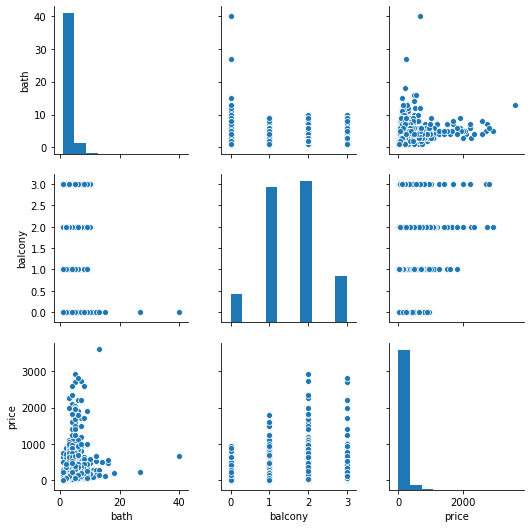

In [156]:
sns.pairplot(bangalore)
# plt.savefig("pairplot")

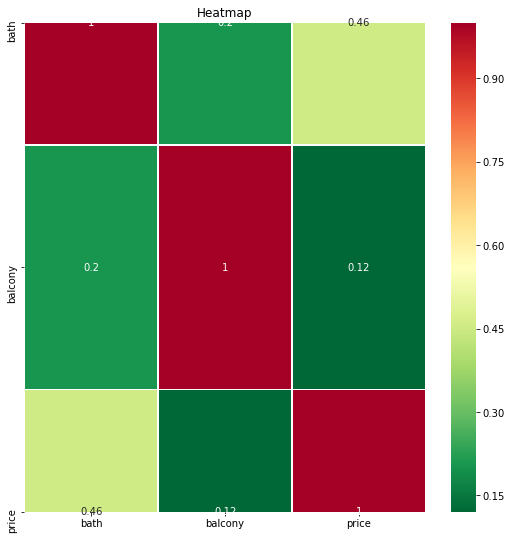

In [150]:
# Pearson correlation
plt.figure(figsize=(9,9))
sns.heatmap(bangalore.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True)
plt.title("Heatmap - Pearson Correlation Coefficients")
# plt.savefig("Heatmap")

In [183]:
var = banglore.groupby("size").price.sum()
var

size
1 BHK         11991.730
1 RK            282.690
11 BHK          360.000
2 BHK        201762.425
2 Bedroom      1824.000
3 BHK        318045.065
3 Bedroom     21154.120
4 BHK         90256.655
4 Bedroom     65996.300
5 BHK          5231.000
5 Bedroom      6555.000
6 BHK          1300.000
6 Bedroom       822.000
7 BHK           250.000
9 BHK           210.000
Name: price, dtype: float64

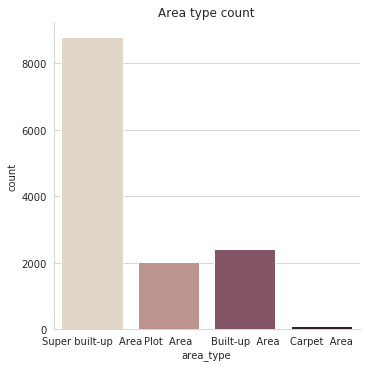

In [211]:
sns.catplot(x="area_type", kind="count", palette="ch:.25", data=bangalore);
plt.title("Area type count")
# plt.savefig("area type barp")

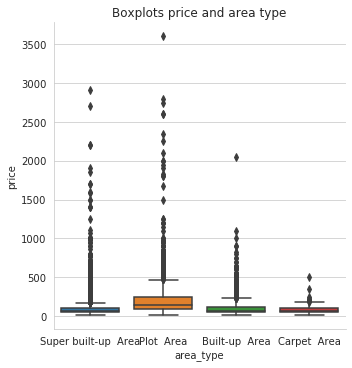

In [193]:
# Boxplots, prices by area types
sns.catplot(x="area_type", y="price", kind="box", data=bangalore)
plt.title("Boxplots price and area type")
# plt.savefig("box price-area")

In [171]:
bangalore.describe(include=['float'])

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [172]:
bangalore.describe(include=['object'])

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843
